# Task 05
#### Analyze traffic accident data to identify patterns related to road conditions, weather and time of day. Visualize accident hotspots and contributing factors.

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [2]:
#Dataset
df = pd.read_csv('US_Accidents_March23.csv')
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
#Data Preprocessing
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')

In [5]:
#Handle the remaining unconverted data
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed', errors='coerce', dayfirst=True)
df['End_Time'] = pd.to_datetime(df['End_Time'], format='mixed', errors='coerce', dayfirst=True)

In [6]:
#Calculate duration in minutes
df['Duration'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 60

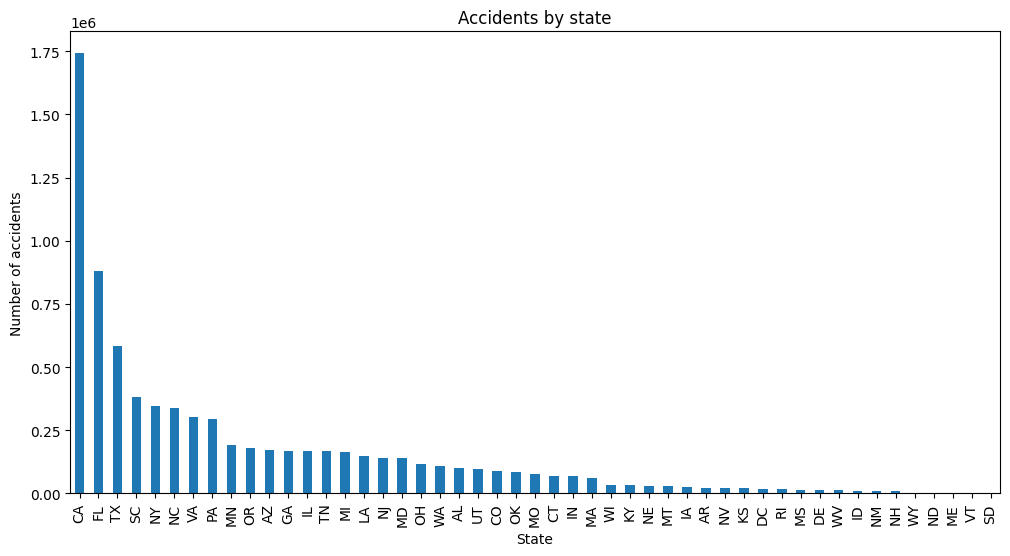

In [7]:
#Accident distribution by state
accident_by_state = df['State'].value_counts()
plt.figure(figsize=(12,6))
accident_by_state.plot(kind='bar')
plt.title("Accidents by state")
plt.xlabel('State')
plt.ylabel('Number of accidents')
plt.show()

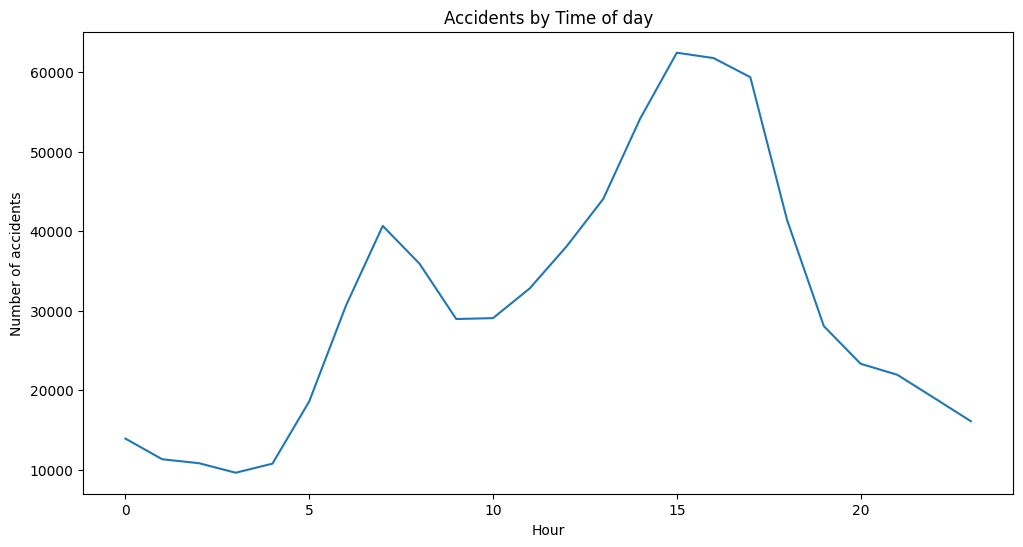

In [8]:
#Accident distribution by time of day
df['Hour'] = df['Start_Time'].dt.hour
accident_by_hour= df['Hour'].value_counts().sort_index()
plt.figure(figsize=(12,6))
accident_by_hour.plot(kind='line')
plt.title("Accidents by Time of day")
plt.xlabel('Hour')
plt.ylabel('Number of accidents')
plt.show()

In [9]:
#Accident hotspot visualization
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)
HeatMap(data=df[['Start_Lat', 'Start_Lng']], radius=8).add_to(m)
m.save('Accident_Hotspots.html')

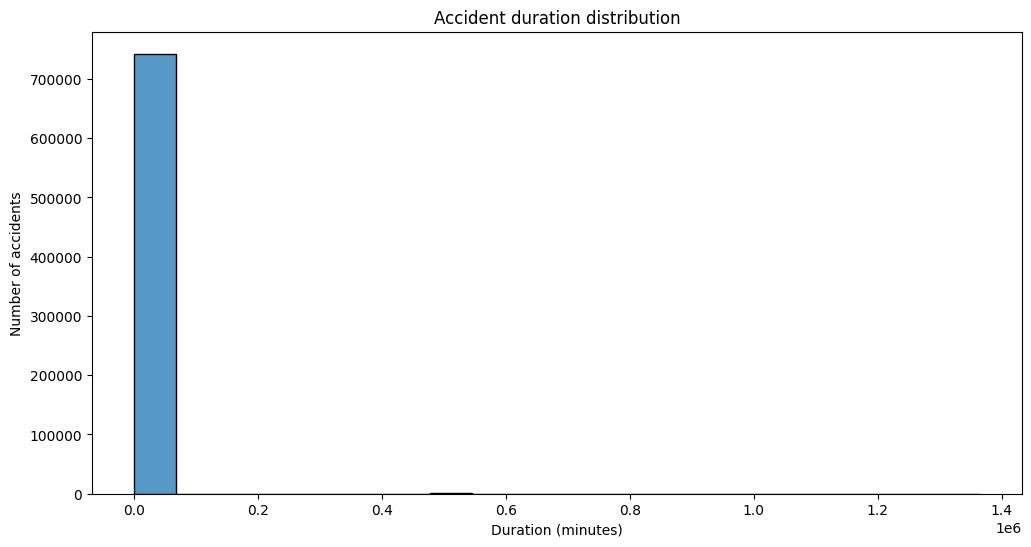

In [10]:
#Accident duration analysis
plt.figure(figsize=(12,6))
sns.histplot(df['Duration'], bins=20)
plt.title("Accident duration distribution")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of accidents")
plt.show()

In [12]:
# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(include=['object']).columns

In [13]:
# Drop or handle non-numeric columns
df = df.drop(non_numeric_cols, axis=1)

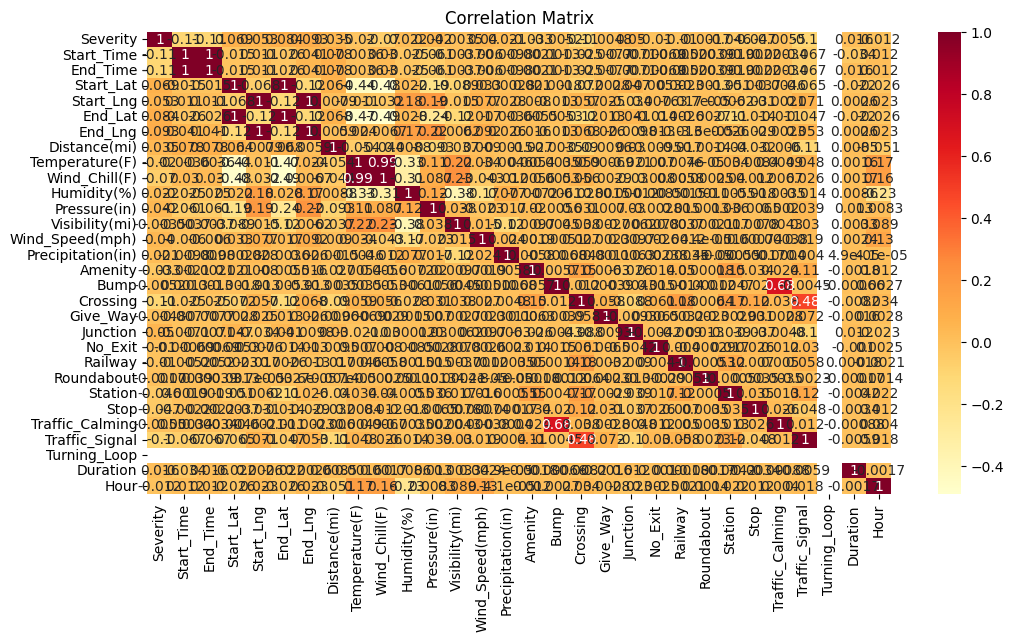

In [14]:
#Correlation Analysis
plt.figure(figsize=(12,6))  
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title("Correlation Matrix")
plt.show()